<img src="CM_logo.png" align="left" height=50% width=50%><img src="Mozfest Logo.png" align="right" height=50% width=50%>

# Welcome to the MozFest 2015 ContentMine Session

### What is this, where am I?

This is an ipython-notebook, an interactive programming environment for python. It consists of cells like this, which contain text, images, or executable code.

You can proceed through each cell by selecting it and pressing `Ctrl + Enter` or by clicking on the `Play` button in the menu bar. This notebook comes with "batteries included", which means it contains some example data and functions we have prepared in advance.

You don't need to know how to program in order to participate and to use this notebook. If you already know some python, please feel free to modify, change and experiment with the code and data.

You find additional links on [this github page](https://github.com/ContentMine/2015-11-07-mozfest15), you can exchange contacts and ideas on [this pad](http://pads.cottagelabs.com/p/mozfest15).

### Let's get started!

The next cell imports the prepared functions into the notebook, select it and execute it with Ctrl+Enter or by clicking "Play"

In [3]:
from resources.readctree import *
from resources.analysis import *
%matplotlib inline

### Reading in the dataset

In the next cell we read the prepared data, which lies in the trialsjournal folder, into the notebook. It will be accessible via `TRIALS`. It is essentially a simple file structure on your harddisk which holds the results of the application of the ContentMine tool chain. Each CProject itself contains many `CTrees`, which are the building blocks of our dataset. 


In [4]:
TRIALS = CProject("trialsjournal")

Right now there are

In [5]:
TRIALS.size

2348

papers in our dataset.

# Let's dive into the data!

Content mining can not only be used for science, but also for questions of public interest, such as which agency or company contributes to which research. This is what we're going to look at now.

First we create a network between papers and entities such as funding agencies or pharmaceutical companies, but also locations or persons mentioned in the "Acknowledgement" section of the paper. In this network a nodes is either a unique identifier of a paper, or the name of an entity. An edge or link between nodes is created when a paper mentions an entity. The entities have been identified with the help of the [Stanford Named Entity Parser](http://nlp.stanford.edu/software/CRF-NER.shtml).

### Choose the type of entity
Choose your type: person, organization, location and enter it into the next function. The next cell should look like one of these lines:
```python
B = TRIALS.create_network("entities", "PERSON")
B = TRIALS.create_network("entities", "ORGANIZATION")
B = TRIALS.create_network("entities", "LOCATION")
```

In [9]:
B = TRIALS.create_network("entities", "LOCATION")

### Make a first visualization
To get a better idea of what we are talking about, we will now create a visualization of the network. Depending on your computer, plotting the network can take a few seconds. In this step there also happens the transformation from a bipartite to a monopartite network. If you want to learn more about networks, there is a sprint this afternoon (Analysing and Visualising Network Data with Max Franz (University of Toronto), 15:30-16:30).

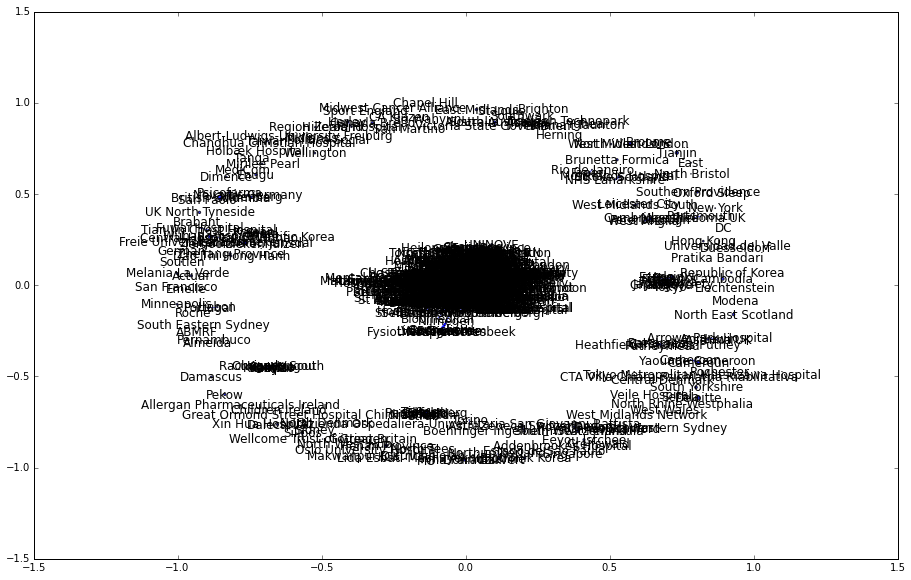

The number of papers in the network:  626
The number of facts (organizations/persons/locations/):  722


In [10]:
paper_nodes = set(n for n,d in B.nodes(data=True) if d['bipartite']==0)
fact_nodes = set(B) - paper_nodes
G = bipartite.weighted_projected_graph(B, fact_nodes)
plotGraph(G, "blue").show()
print "The number of papers in the network: ", len(paper_nodes)
print "The number of facts (organizations/persons/locations/): ", len(fact_nodes)

In the new network there are only nodes of entities, and a link is created by them if they are mentioned by the same paper. In this way it is possible to identify funding agencies or corporations, that are more closely related than others.

### Check for occurrence of a name in the dataset
We can check whether a specific location/organization/person is in the network with the next function.

In [13]:
search_for = "Department of Health"
search_for in fact_nodes

False

### Investigate the most mentioned organizations/persons/locations

The next function will show us the Top 10 persons/organizations/locations with the most connections to other entities (so called degree centrality). It will give you a certain part of the list (which is sorted in descending order, with the highest connected node first). You can view different parts of the list by changing `start_n` and `stop_n`.

In [22]:
start_n = 0 # enter a number here
stop_n = 10 # # this will give us the top 10
degreeCent = nx.algorithms.degree_centrality(G)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_n:stop_n]:
    print node

UK
Germany
France
Italy
The Netherlands
Spain
London
Canada
Amsterdam
Stuttgart


### Get more details

We can have a closer look at the number and name of neighbors of a node through the "neighbors" function. Pick a name from the list above!

In [16]:
your_variable = "Kirby Institute" # type the name between ""
print "Number of neighbors:", len(G.neighbors(your_variable))
for neighbor in G.neighbors(your_variable):
    print neighbor

Number of neighbors:

NetworkXError: The node Kirby Institute is not in the graph.

### Visualize communities to get a closer look
We identify the three biggest communities of entities and plot them separately. A community subgraph is a collection of e.g. persons that is connected with eachother, but not with the rest of the network. It also prints the location/organization/perons with the most connections in the community.

UK


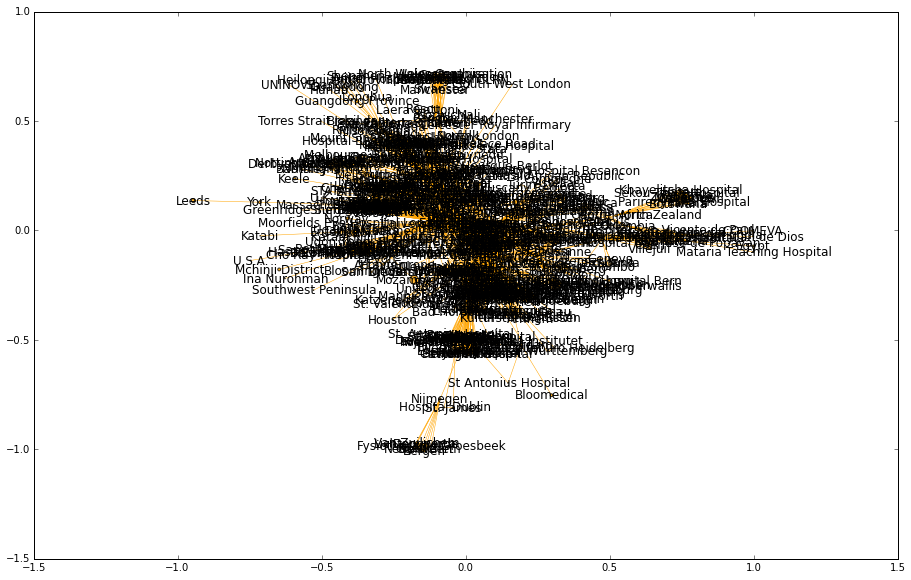

Japan


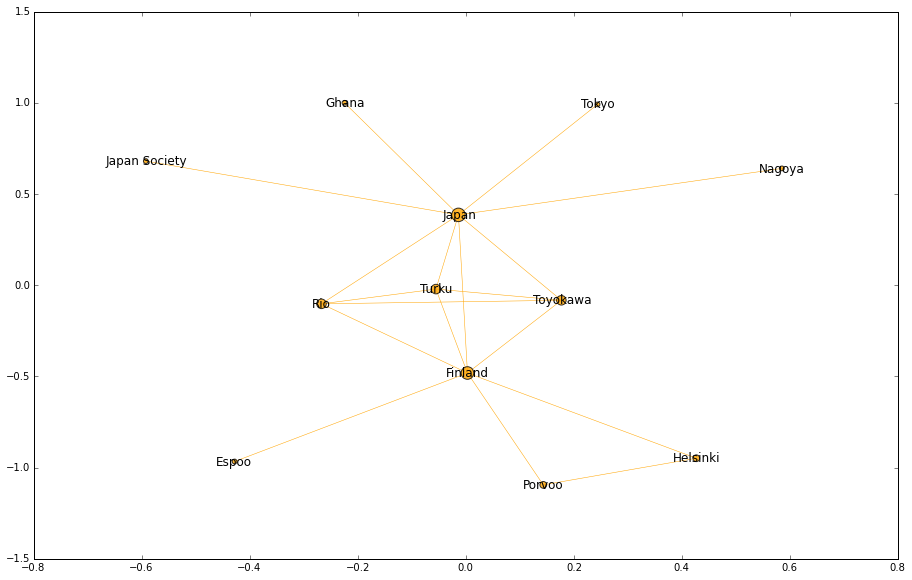

Rammelsberg


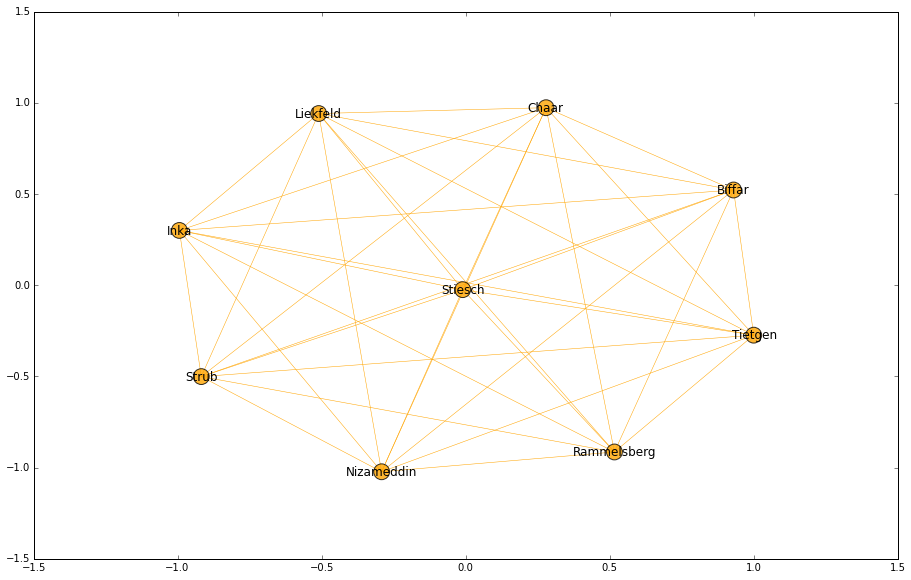

In [23]:
start_n = 0 # pick a number between 1 and 50
stop_n = 3
subgraphs = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[start_n:stop_n]
for sg in subgraphs:
    degreeCent = nx.algorithms.degree_centrality(sg)
    print max(degreeCent, key=degreeCent.get)
    plotGraph(sg, "orange").show() # choose a color, e.g. red, blue, green, ...

### Put a fact into context

In the next cell you can enter an institution/location/perons of you interest, and see in which papers they are mentioned, what their titles are, and also print the text of the acknowledgement section. Depending on how busy it was, the list can get a bit long!

In [20]:
your_variable = "Japan"
for ID in B.neighbors(your_variable):
    print ID, TRIALS.get_title(ID)
    print TRIALS.get_ctree(ID).get_section("Acknowledgements")

PMC3154155 TREC-SAVE: a randomised trial comparing mechanical restraints with use of seclusion
         for aggressive or violent seriously mentally ill people: study protocol for a randomised
         controlled trial
      
University Hospital Clementino Fraga Filho-Federal University of Rio de Janeiro National Institute of Quality Control in Health-Oswaldo Cruz Foundation We are grateful for the help and direction of Dr Ichiro Omori (Toyokawa, Japan) for and Professor Maritta Võlimõki (Turku, Finland) for support and advice regarding outcome measures. The acronym is derived from the past studies undertaken by this team in Rio (Tranquilização Rápida-Ensaio Clínico [Translation: Rapid Tranquillisation-Clinical Trial]) combined with Segurança no manejo da Agressão: Viabilidade e Ética na contenção e isolamento (Translation: Safe management of aggression: feasible and ethical study of seclusion or restraint). TREC-SAVE Collaborative Team Maria Conceição da Silva Luana Laurito Fernanda A

### A network to take home
The next cell creates a small network around your chosen organization/location/locations, where related facts, papers they are mentioned in, and also the authors who wrote the papers are visualized. We also save your graph onto the disk in a higher resolution, so you can view it with more pleasure :) You can find it in the MozFest2015 folder.

Don't forget to choose a color!

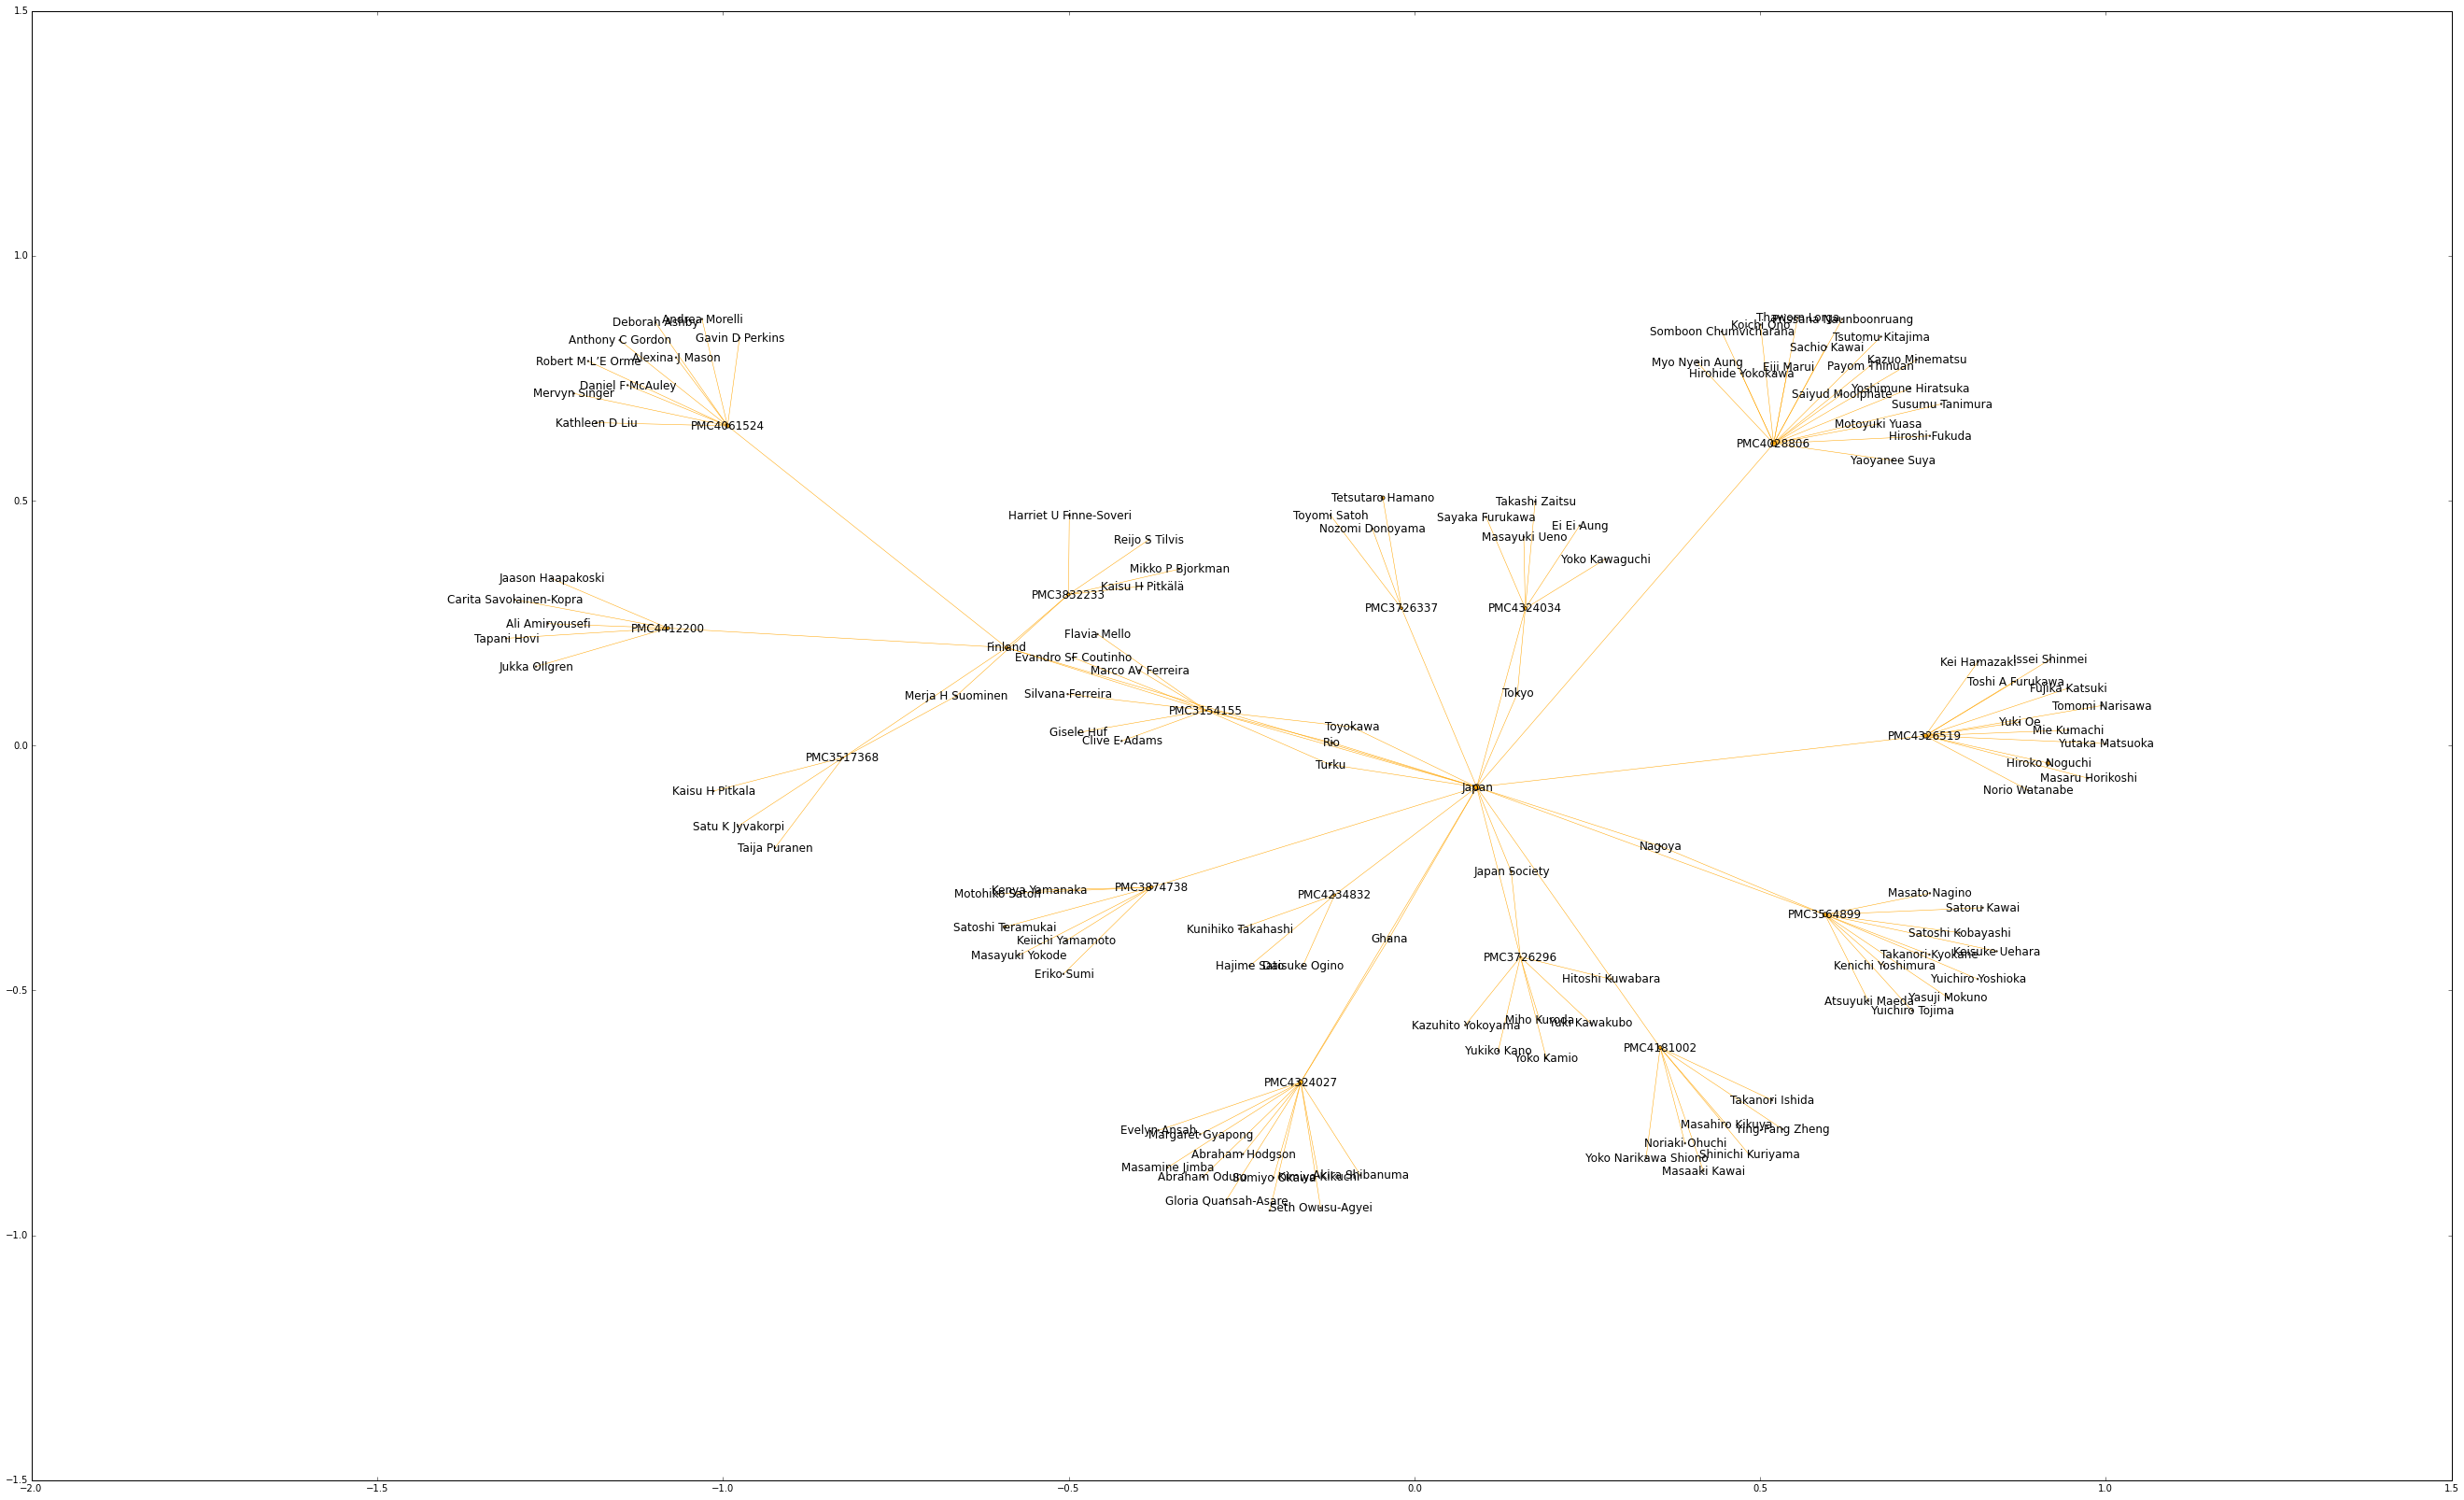

In [21]:
your_graph = create_subgraph(TRIALS, B, G, your_variable)
save_graph(your_graph, "orange")